<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>Machine Learning | Game of Throne Characters Alive Analysis</h2>
</h4><br>Mengting Lin<br></h4>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>Part I: Feature Engineering<br>

Import necessary packages, load data, and set display options for pandas.

In [1]:
########################
## importing packages ##
########################

# essentials
import matplotlib.pyplot as plt # data visualization
import seaborn           as sns # enhanced data viz
import pandas            as pd  # data science essentials
import numpy             as np  # mathematical essentials


# machine learning
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.ensemble import RandomForestClassifier     # random forest


##############################################
## loading data and setting display options ##
##############################################

# loading data
GOT = pd.read_excel('./__storage/GOT_character_predictions.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


Create user-defined functions

In [2]:
################
## mv_flagger ##
################

def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df


###############
## visual_cm ##
###############

def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

Deal With Missing Values:

1. Flagging missing values
2. Imputing missing values: 'culture','house','father','mother','heir','spouse'.

In [3]:
# running the mv_flagger function
GOT = mv_flagger(GOT)


# checking results
GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [4]:
# imputing missing values
GOT['house'] = GOT['house'].fillna('Unknown')
GOT['mother'] = GOT['mother'].fillna('Unknown')
GOT['father'] = GOT['father'].fillna('Unknown')
GOT['heir'] = GOT['heir'].fillna('Unknown')
GOT['spouse'] = GOT['spouse'].fillna('Unknown')
GOT['isAliveMother'] = GOT['isAliveMother'].fillna('Unknown')
GOT['isAliveFather'] = GOT['isAliveFather'].fillna('Unknown')
GOT['isAliveHeir'] = GOT['isAliveHeir'].fillna('Unknown')
GOT['isAliveSpouse'] = GOT['isAliveSpouse'].fillna('Unknown')
GOT['culture'] = GOT['culture'].fillna('Unknown')

# checking results
GOT['house'].isnull().sum(axis = 0)
GOT['mother'].isnull().sum(axis = 0)
GOT['father'].isnull().sum(axis = 0)
GOT['heir'].isnull().sum(axis = 0)
GOT['spouse'].isnull().sum(axis = 0)
GOT['isAliveMother'].isnull().sum(axis = 0)
GOT['isAliveFather'].isnull().sum(axis = 0)
GOT['isAliveHeir'].isnull().sum(axis = 0)
GOT['isAliveSpouse'].isnull().sum(axis = 0)
GOT['culture'].isnull().sum(axis = 0)

0

Imputing 'culture' by classification 'culture' to 'contemporary culture', 'ancient culture', 'other culture' and 'unknown culture'. 'culture' may help indicate the factors of geographic, time, or group attribute to the cause of 'isAlive'.

In [5]:
# creating contemporary cultures column
GOT['contemporary_cultures'] = 0

# looping to find elements belong to contemparary culture
for index, val in GOT.iterrows():
    
    if 'Northmen' in GOT.loc[ index, 'culture']:
        GOT.loc[ index, 'contemporary_cultures' ] = 1
    
    elif 'Rivermen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Riverlands' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Crannogmen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'northmen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Wildlings' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Wildling' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'westermen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Westerman' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Free Folk' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'free folk' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Reachmen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Free folk' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Lhazarene' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'The Reach' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
    
    elif 'Reach' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Valemen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
    
    elif 'Valyrian' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Dornish' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Dorne' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Dornishmen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Dothraki' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Lhazareen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Qartheen' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Asshai' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif "Asshai'i" in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Stormlands' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Ibbenese' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        
    elif 'Westeros' in GOT.loc[ index, 'culture'] and \
        GOT.loc[ index, 'book1_A_Game_Of_Thrones'] == 0:
        GOT.loc[index, 'contemporary_cultures' ] = 1
    
    elif 'Ironborn' in GOT.loc[ index, 'culture'] and \
        GOT.loc[ index, 'book1_A_Game_Of_Thrones'] == 0:
        GOT.loc[index, 'contemporary_cultures' ] = 1

    elif 'Ironmen' in GOT.loc[ index, 'culture'] and \
        GOT.loc[ index, 'book1_A_Game_Of_Thrones'] == 0:
        GOT.loc[index, 'contemporary_cultures' ] = 1
        

# creating ancient cultures column
GOT['ancient_cultures'] = 0

# looping to find elements belong to ancient culture
for index, val in GOT.iterrows():
    
    if 'First Men' in GOT.loc[ index, 'culture']:
        GOT.loc[ index, 'ancient_cultures' ] = 1
        
    elif 'Andals' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'ancient_cultures' ] = 1
        
    elif 'Andal' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'ancient_cultures' ] = 1
        
    elif 'Rhoynar' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'ancient_cultures' ] = 1
        
    elif 'Ghiscari' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'ancient_cultures' ] = 1
        
    elif 'Ghiscaricari' in GOT.loc[ index, 'culture']:
        GOT.loc[index, 'ancient_cultures' ] = 1

    elif 'Westeros' in GOT.loc[ index, 'culture'] and \
        GOT.loc[ index, 'book1_A_Game_Of_Thrones'] == 1:
        GOT.loc[index, 'ancient_cultures' ] = 1
        
    elif 'Ironborn' in GOT.loc[ index, 'culture'] and \
        GOT.loc[ index, 'book1_A_Game_Of_Thrones'] == 1:
        GOT.loc[index, 'ancient_cultures' ] = 1

    elif 'Ironmen' in GOT.loc[ index, 'culture'] and \
        GOT.loc[ index, 'book1_A_Game_Of_Thrones'] == 1:
        GOT.loc[index, 'ancient_cultures' ] = 1
        

# creating unknown cultures column
GOT['unknown_cultures'] = 0

# looping to find elements belong to unknown culture
for index, val in GOT.iterrows():
    
    if 'Unknown' in GOT.loc[ index, 'culture']:
        GOT.loc[ index, 'unknown_cultures' ] = 1
        

# creating other other_cultures column
GOT['other_cultures'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  GOT.loc[ index, 'ancient_cultures'] == 0 and \
        GOT.loc[ index, 'contemporary_cultures'] == 0 and \
        GOT.loc[ index, 'unknown_cultures'] == 0: 
        GOT.loc[ index, 'other_cultures' ] = 1
        

Imputing 'house' by classificaion 'house' to the main nine great houses individually and 'unknown house', 'other house'.

In [6]:
# creating is House Stark column
GOT['is_House_Stark'] = 0

# looping to find elements belong to is_House_Stark
for index, val in GOT.iterrows():
    
    if  'Stark' in GOT.loc[ index, 'house'] or \
        'Stark' in GOT.loc[ index, 'name']:
        GOT.loc[ index, 'is_House_Stark' ] = 1     
        
        
# creating is House Targaryen column
GOT['is_House_Targaryen'] = 0

# looping to find elements belong to is_House_Targaryen
for index, val in GOT.iterrows():
    
    if  'Targaryen' in GOT.loc[ index, 'house'] or \
        'Targaryen' in GOT.loc[ index, 'name']:
        GOT.loc[ index, 'is_House_Targaryen' ] = 1     
        

# creating is House Lannister column
GOT['is_House_Lannister'] = 0

# looping to find elements belong to is_House_Lannister
for index, val in GOT.iterrows():
    
    if  'Lannister' in GOT.loc[ index, 'house'] or \
        'Lannister' in GOT.loc[ index, 'name']:    
        GOT.loc[ index, 'is_House_Lannister' ] = 1     
        


# creating is House Arryn column
GOT['is_House_Arryn'] = 0

# looping to find elements belong to is_House_Arryn
for index, val in GOT.iterrows():
    
    if  'Arryn' in GOT.loc[ index, 'house'] or \
        'Arryn' in GOT.loc[ index, 'name']:        
        GOT.loc[ index, 'is_House_Arryn' ] = 1     



# creating ancient cultures column
GOT['is_House_Tully'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  'Tully' in GOT.loc[ index, 'house'] or \
        'Tully' in GOT.loc[ index, 'name']:        
        GOT.loc[ index, 'is_House_Tully' ] = 1     



# creating ancient cultures column
GOT['is_House_Greyjoy'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  'Greyjoy' in GOT.loc[ index, 'house'] or \
        'Greyjoy' in GOT.loc[ index, 'name']:       
        GOT.loc[ index, 'is_House_Greyjoy' ] = 1     
        


# creating ancient cultures column
GOT['is_House_Baratheon'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  'Baratheon' in GOT.loc[ index, 'house'] or \
        'Baratheon' in GOT.loc[ index, 'name']:        
        GOT.loc[ index, 'is_House_Baratheon' ] = 1     


        
# creating ancient cultures column
GOT['is_House_Tyrell'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  'Tyrell' in GOT.loc[ index, 'house'] or \
        'Tyrell' in GOT.loc[ index, 'name']:        
        GOT.loc[ index, 'is_House_Tyrell' ] = 1     



# creating ancient cultures column
GOT['is_House_Martell'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  'Martell' in GOT.loc[ index, 'house'] or \
        'Martell' in GOT.loc[ index, 'name']:        
        GOT.loc[ index, 'is_House_Martell' ] = 1     

        
        
# creating ancient cultures column
GOT['is_House_Unknown'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  'Unknown' in GOT.loc[ index, 'house']:        
        GOT.loc[ index, 'is_House_Unknown' ] = 1     



# creating other other_cultures column
GOT['other_house'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  GOT.loc[ index, 'is_House_Stark'] == 0 and \
        GOT.loc[ index, 'is_House_Targaryen'] == 0 and \
        GOT.loc[ index, 'is_House_Arryn'] == 0 and \
        GOT.loc[ index, 'is_House_Lannister'] == 0 and \
        GOT.loc[ index, 'is_House_Tully'] == 0 and \
        GOT.loc[ index, 'is_House_Greyjoy'] == 0 and \
        GOT.loc[ index, 'is_House_Baratheon'] == 0 and \
        GOT.loc[ index, 'is_House_Tyrell'] == 0 and \
        GOT.loc[ index, 'is_House_Martell'] == 0 and \
        GOT.loc[ index, 'is_House_Unknown'] == 0:        
        GOT.loc[ index, 'other_house' ] = 1


# creating other other_cultures column
GOT['great_house'] = 0

# looping to find elements belong to other_cultures
for index, val in GOT.iterrows():
    
    if  GOT.loc[ index, 'is_House_Stark'] == 1 or \
        GOT.loc[ index, 'is_House_Targaryen'] == 1 or \
        GOT.loc[ index, 'is_House_Arryn'] == 1 or \
        GOT.loc[ index, 'is_House_Lannister'] == 1 or \
        GOT.loc[ index, 'is_House_Tully'] == 1 or \
        GOT.loc[ index, 'is_House_Greyjoy'] == 1 or \
        GOT.loc[ index, 'is_House_Baratheon'] == 1 or \
        GOT.loc[ index, 'is_House_Tyrell'] == 1 or \
        GOT.loc[ index, 'is_House_Martell'] == 1:        
        GOT.loc[ index, 'great_house' ] = 1


Imputing 'father', 'mother', 'heir', and 'spouse' here together since each of them has small samples which can not really contribute to the accuracy of predicting 'isAlive' individually. I think it is better to put all of these into a group to see if has any of these can attribute to the cause of 'isAlive'. This can indicate that the has 'relative' may lead to alive or die.

In [7]:
# creating other has father or mother or heir column
GOT['has_father_or_mother_or_heir_or_spouse'] = 0

# looping to find elements belong to has father or mother or heir
for index, val in GOT.iterrows():
    
    if  GOT.loc[ index, 'm_father'] == 0 or \
        GOT.loc[ index, 'm_mother'] == 0 or \
        GOT.loc[ index, 'm_spouse'] == 0 or \
        GOT.loc[ index, 'm_heir'] == 0:        
        GOT.loc[ index, 'has_father_or_mother_or_heir_or_spouse' ] = 1


# creating other father or mother or heir or spouse is alive column
GOT['is_father_or_mother_or_heir_or_spouse_alive'] = 0

# looping to find elements belong to father or mother or heir or spouse is alive 
for index, val in GOT.iterrows():
    
    if  GOT.loc[ index, 'isAliveMother'] == 1 or \
        GOT.loc[ index, 'isAliveFather'] == 1 or \
        GOT.loc[ index, 'isAliveHeir'] == 1 or \
        GOT.loc[ index, 'isAliveSpouse'] == 1:        
        GOT.loc[ index, 'is_father_or_mother_or_heir_or_spouse_alive' ] = 1


Based on the great houses, I classify them in geographically to North and South to see if this can attribute to the cause of 'isAlive'.

In [8]:
# creating other The South column
GOT['The_South'] = 0

# looping to find elements belong to The South
for index, val in GOT.iterrows():
    
    if  GOT.loc[ index, 'is_House_Targaryen'] == 1 or \
        GOT.loc[ index, 'is_House_Arryn'] == 1 or \
        GOT.loc[ index, 'is_House_Lannister'] == 1 or \
        GOT.loc[ index, 'is_House_Baratheon'] == 1 or \
        GOT.loc[ index, 'is_House_Martell'] == 1 or \
        GOT.loc[ index, 'is_House_Tyrell'] == 1 or \
        GOT.loc[ index, 'is_House_Tully'] == 1:        
        GOT.loc[ index, 'The_South' ] = 1

# creating other The North column
GOT['The_North'] = 0

# looping to find elements belong to The North 
for index, val in GOT.iterrows():
    
    if  GOT.loc[ index, 'is_House_Stark'] == 1 or \
        GOT.loc[ index, 'is_House_Greyjoy'] == 1:        
        GOT.loc[ index, 'The_North' ] = 1


Dropping features and prepare the clean data

In [9]:
# dropping categorical variables after they've been encoded
GOT = GOT.drop(['title', 'name', 'culture', 'house', 'spouse', 'isAliveMother',
                'isAliveFather','isAliveHeir','isAliveSpouse', 'age', 'm_house',
                'm_culture','m_mother','m_father','m_heir','m_spouse',
                'm_isAliveSpouse','m_isAliveMother', 'm_isAliveFather', 
                'm_isAliveHeir','mother','father','heir','dateOfBirth'], axis = 1)


# checking the results
GOT.columns

Index(['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_dateOfBirth', 'm_age', 'contemporary_cultures', 'ancient_cultures', 'unknown_cultures', 'other_cultures', 'is_House_Stark', 'is_House_Targaryen', 'is_House_Lannister', 'is_House_Arryn', 'is_House_Tully', 'is_House_Greyjoy', 'is_House_Baratheon', 'is_House_Tyrell', 'is_House_Martell', 'is_House_Unknown', 'other_house', 'great_house', 'has_father_or_mother_or_heir_or_spouse', 'is_father_or_mother_or_heir_or_spouse_alive', 'The_South', 'The_North'], dtype='object')

<br>Part II: Model Building Process<br>

1. Start model busilding by reparing explanatory and response data
2. Building models

In [10]:
# declaring explanatory variables
GOT_data = GOT.drop('isAlive', axis = 1)


# declaring response variable
GOT_target = GOT.loc[ : , 'isAlive']

Here are the explanatory sets from Part I. The 'logit_full' is based on the result from the data after feature engineering. The other sets is based on the correlation analysis, logistic regression model in statsmodels' analysis, and plotting feature importance. During this process, I figured out that the results from correlation may be different from the logistic regression model in statsmodels or results shown from the plotting feature importance. Some data shows positive relationships in one but not in another. For example, 'The_South'. Thus, I finally decided to select explanatory variables for my model based on further secondary research or my thinking. 

In [11]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows',
                   'book5_A_Dance_with_Dragons', 'isMarried','isNoble',
                   'numDeadRelations', 'popularity', 'm_age', 'has_title',
                   'contenporary_cultures', 'ancient_cultures', 'unknown_cultures',
                   'other_cultures', 'is_House_Stark', 'is_House_Targaryen',
                   'is_House_Lannister', 'is_House_Arryn', 'is_House_Tully',
                   'is_House_Greyjoy', 'is_House_Baratheon', 'is_House_Tyrell', 
                   'is_House_Martell', 'is_House_Unknown', 'other_house', 
                   'great_house', 'has_father_or_mother_or_heir_or_spouse',
                   'is_father_or_mother_or_heir_or_spouse_alive', 'The_South',
                   'The_North'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['contemporary_cultures', 'm_age', 'great_house',
                   'book4_A_Feast_For_Crows', 'book3_A_Storm_Of_Swords', 
                   'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones',
                   'is_House_Targaryen', 'is_House_Lannister', 
                   'is_House_Arryn', 'is_House_Tully','is_House_Greyjoy',
                   'is_House_Tyrell','book1_A_Game_Of_Thrones',
                   'other_house', 'unknown_cultures'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['The_South','m_age', 'contemporary_cultures', 'book1_A_Game_Of_Thrones',
                   'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows',
                   'great_house','is_House_Stark','book5_A_Dance_with_Dragons',
                   'other_house', 'is_House_Lannister',
                   'is_father_or_mother_or_heir_or_spouse_alive','isNoble']

}

<br>Part III: Random Forest Model Building<br>

In here, I choose to use 'logit_sig_2' explanatiry set to apply in Random Forest Model type to build my model, since this is the best result compare to the others as following:

In [19]:
# logit_sig comparing results
print(f"""
logi_sig:
Model                  AUC Score          Gap
-----                  ---------       ---------
Logistic Regression   |  0.6766          0.0587                
KNN                   |  0.6462          0.0044     
Classification Tree   |  0.6931          0.0506
Random Forest         |  0.7793          0.0357
""")

# logit_sig_2 comparing results
print(f"""
logi_sig_2:
Model                  AUC Score          Gap
-----                  ---------       ----------
Logistic Regression   |  0.6731           0.0558                
KNN                   |  0.6431           0.0125     
Classification Tree   |  0.7528           0.0757
* Random Forest       |  0.8131           0.0573

'*' means final selection

My final Model Information:
1. Model name: Random Forest
2. Training Accuracy: 0.8401
3. Testing Accuracy: 0.8974
4. AUC Score: 0.8131
5. Confusion Matrix:
True Negatives : 32
False Positives: 18
False Negatives: 2
True Positives : 143
""")


logi_sig:
Model                  AUC Score          Gap
-----                  ---------       ---------
Logistic Regression   |  0.6766          0.0587                
KNN                   |  0.6462          0.0044     
Classification Tree   |  0.6931          0.0506
Random Forest         |  0.7793          0.0357


logi_sig_2:
Model                  AUC Score          Gap
-----                  ---------       ----------
Logistic Regression   |  0.6731           0.0558                
KNN                   |  0.6431           0.0125     
Classification Tree   |  0.7528           0.0757
* Random Forest       |  0.8131           0.0573

'*' means final selection

My final Model Information:
1. Model name: Random Forest
2. Training Accuracy: 0.8401
3. Testing Accuracy: 0.8974
4. AUC Score: 0.8131
5. Confusion Matrix:
True Negatives : 32
False Positives: 18
False Negatives: 2
True Positives : 143



In [13]:
# train/test split with the full model
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig_2']]
GOT_target =  GOT.loc[ : , 'isAlive']

# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target)

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Random Forest Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Random Forest Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('Random Forest AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Random Forest Training ACCURACY: 0.8418
Random Forest Testing  ACCURACY: 0.8359
Random Forest AUC Score        : 0.7128


In [14]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/Users/mengtinglin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 600, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.626


In [15]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=600, random_state=219,
                       warm_start=True)

In [16]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 1,
                                      n_estimators     = 600,
                                      warm_start       = True,
                                      bootstrap        = True,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8401
Forest Tuned Testing  ACCURACY: 0.8974
Forest Tuned AUC Score        : 0.8131


Apply the model results to confusion matrix to double check the model accuracy from both positive cases and negative cases to avoid the imbalanced event horizon. 

In [17]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 2
True Positives : 143



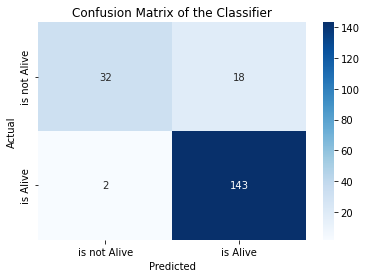

In [18]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = forest_tuned_pred,
          labels = ['is not Alive', 'is Alive'])

In conclusion, after finishing building the model and applying the confusion matrix for double-checking the model. My predict model shows that the success rate of predicting 'isAlive' reaches 98.62%. Based on my model, characters live in the south or has contemporary cultures, which means after the Targaryen Conquest of the Seven Kingdoms, or belong to Stark House, or belongs to Nobel, has any of father, mother, spouse, or heir alive, etc., lead to the characters alive.